**OVERVIEW**

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

Following are the steps required to create a text classification model in Python:

    Importing Libraries
    Importing The dataset
    Text Preprocessing
    Converting Text to Numbers
    Training and Test Sets
    Training Text Classification Model and Predicting 
    Evaluating The Model
    Saving and Loading the Model

**1. Importing Libraries**

In [1]:
#import of all the necessary machine learning libraries
import numpy as np # linear algebra
import pandas as pd # data processing

##Data Cleaning
import nltk #
import string #to remove all punctuation marks in the corpus/ document
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Models imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC

ps = nltk.PorterStemmer()

from sklearn.model_selection import train_test_split

import pickle

from sklearn.metrics import classification_report, accuracy_score
# set plot style
sns.set()

**2. Importing The dataset**

In [2]:
df_train = pd.read_csv('~/Downloads/Explore/Machine Learning/Hackathon/train_set.csv')
train = df_train.copy() # creating a copy of the train dataset

In [3]:
df_test = pd.read_csv('~/Downloads/Explore/Machine Learning/Hackathon/test_set.csv')
test = df_test.copy()  # creating a copy of the test dataset

In [4]:
train.head() # exploring the top rows of the dataset

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [5]:
test.head() #exploring the top rows of the test dataset

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [18]:
train.head(20)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


 - This data shows no signs of URL, Twitter handles and no sign of any other none alphabetic characters

In [4]:
train.tail()

,lang_id,text
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999,sot,mafapha a mang le ona a lokela ho etsa ditlale...


In [8]:
train.shape ,test.shape

((33000, 2), (5682, 2))

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


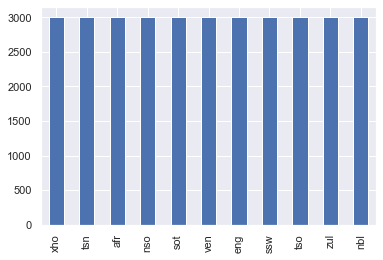

In [11]:
train['lang_id'].value_counts().plot(kind = 'bar')
plt.show()

The data shows no imbalance within the classes.

In [4]:
df1_train = train.copy()

In [5]:
df1_test = test.copy()

In [16]:
df1_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [37]:
df1_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


**Text Preprocessing**

In [6]:
X1 = df1_test['text']

In [7]:
X = df1_train['text']
y = df1_train['lang_id']

In [8]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [9]:
documents1 = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X1)):
    # Remove all the special characters
    document1 = re.sub(r'\W', ' ', str(X1[sen]))
    
    # remove all single characters
    document1 = re.sub(r'\s+[a-zA-Z]\s+', ' ', document1)
    
    # Remove single characters from the start
    document1 = re.sub(r'\^[a-zA-Z]\s+', ' ', document1) 
    
    # Substituting multiple spaces with single space
    document1 = re.sub(r'\s+', ' ', document1, flags=re.I)
    
    # Removing prefixed 'b'
    document1 = re.sub(r'^b\s+', '', document1)
    
    # Converting to Lowercase
    document1 = document1.lower()
    
    # Lemmatization
    document1 = document1.split()

    document1 = [stemmer.lemmatize(word) for word in document1]
    document1 = ' '.join(document1)
    
    documents1.append(document1)

**Converting Text to Numbers**

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X1 = vectorizer.fit_transform(documents1).toarray()

Term frequency = (Number of Occurrences of a word)/(Total words in the document)

IDF(word) = Log((Total number of documents)/(Number of documents containing the word))

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X1 = tfidfconverter.fit_transform(X).toarray()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

**Training Text Classification Model and Predicting**

**RANDOM FOREST CLASSIFIERS**

In [24]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
print("The accuracy score of the Random Forest Classifier is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

The accuracy score of the Random Forest Classifier is: 0.9646969696969697


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       613
         eng       0.98      0.98      0.98       572
         nbl       0.91      0.90      0.90       596
         nso       1.00      0.99      1.00       572
         sot       1.00      1.00      1.00       597
         ssw       0.92      0.94      0.93       612
         tsn       0.99      1.00      0.99       622
         tso       1.00      1.00      1.00       599
         ven       1.00      1.00      1.00       582
         xho       0.92      0.93      0.93       594
         zul       0.90      0.89      0.90       641

    accuracy                           0.96      6600
   macro avg       0.97      0.97      0.97      6600
weighted avg       0.96      0.96      0.96      6600



**DECISION TREES**

In [27]:
dtree = DecisionTreeClassifier(random_state=42)

In [28]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
y_dt_pred = classifier.predict(X_test)

In [42]:
print("The accuracy score of the Decision trees is:", accuracy_score(y_test, y_dt_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_dt_pred))

The accuracy score of the Decision trees is: 0.9646969696969697


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       613
         eng       0.98      0.98      0.98       572
         nbl       0.91      0.90      0.90       596
         nso       1.00      0.99      1.00       572
         sot       1.00      1.00      1.00       597
         ssw       0.92      0.94      0.93       612
         tsn       0.99      1.00      0.99       622
         tso       1.00      1.00      1.00       599
         ven       1.00      1.00      1.00       582
         xho       0.92      0.93      0.93       594
         zul       0.90      0.89      0.90       641

    accuracy                           0.96      6600
   macro avg       0.97      0.97      0.97      6600
weighted avg       0.96      0.96      0.96      6600



**SUPPORT VECTOR MACHINE CLASSIFIER**

In [19]:
svc = SVC(kernel='linear')

In [20]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
y_hat = svc.predict(X_test)

In [22]:
print("The accuracy score of the Naive Bayesian classifier is:", accuracy_score(y_test, y_hat))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_hat))

The accuracy score of the Naive Bayesian classifier is: 0.9742424242424242


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       613
         eng       0.99      0.98      0.99       572
         nbl       0.93      0.92      0.93       596
         nso       1.00      1.00      1.00       572
         sot       1.00      1.00      1.00       597
         ssw       0.93      0.96      0.95       612
         tsn       0.99      1.00      1.00       622
         tso       1.00      1.00      1.00       599
         ven       1.00      1.00      1.00       582
         xho       0.94      0.95      0.95       594
         zul       0.93      0.91      0.92       641

    accuracy                           0.97      6600
   macro avg       0.97      0.97      0.97      6600
weighted avg       0.97      0.97      0.97      6600



In [28]:
#Make submission
My_Submission = pd.DataFrame(X_test)
My_Submission['lang_id'] = svc.predict(X_test)
My_Submission.to_csv('Emanuel_Dikotla.csv',index=False)

In [ ]:
#Make submission
My_Submission = pd.DataFrame(df1_test['index'])
My_Submission['lang_id'] = svc.predict(X1)
My_Submission.to_csv('Emanuel_Dikotla1.csv',index=False)

In [54]:
svm = SVC()

In [55]:
svc = SVC(kernel='rbf')

In [56]:
svc.fit(X_train, y_train)

SVC()

In [57]:
y_bar = svc.predict(X_test)

In [58]:
print("The accuracy score of the Naive Bayesian classifier is:", accuracy_score(y_test, y_hat))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_hat))

The accuracy score of the Naive Bayesian classifier is: 0.9742424242424242


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       613
         eng       0.99      0.98      0.99       572
         nbl       0.93      0.92      0.93       596
         nso       1.00      1.00      1.00       572
         sot       1.00      1.00      1.00       597
         ssw       0.93      0.96      0.95       612
         tsn       0.99      1.00      1.00       622
         tso       1.00      1.00      1.00       599
         ven       1.00      1.00      1.00       582
         xho       0.94      0.95      0.95       594
         zul       0.93      0.91      0.92       641

    accuracy                           0.97      6600
   macro avg       0.97      0.97      0.97      6600
weighted avg       0.97      0.97      0.97      6600



In [ ]:
My_Submission = pd.DataFrame(test['index'])
My_Submission['lang_id'] =  svc.predict(X_test)
My_Submission.to_csv('Emanuel_Dikotla', index=False)

**Saving and Loading the Model**

- The score of both the support vactor machine models appears to be the same 
- The support vector machine has outperformed the rest of the models and thus being accepted 